In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Bidirectional

In [4]:
df = pd.read_csv('yahoo_stock.csv')

In [11]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1825 non-null   datetime64[ns]
 1   High       1825 non-null   float64       
 2   Low        1825 non-null   float64       
 3   Open       1825 non-null   float64       
 4   Close      1825 non-null   float64       
 5   Volume     1825 non-null   float64       
 6   Adj Close  1825 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 99.9 KB


In [7]:
df[1:].describe()

,High,Low,Open,Close,Volume,Adj Close
count,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1824.000000
mean,2661.028491,2633.119898,2648.010833,2648.163996,3.869781e+09,2648.163996
std,409.579291,404.214561,407.071584,407.200628,1.087871e+09,407.200628
min,1847.000000,1810.099976,1833.400024,1829.079956,1.296540e+09,1829.079956
25%,2348.942444,2327.274963,2341.979980,2335.422546,3.257950e+09,2335.422546
50%,2696.250000,2669.295044,2685.704956,2683.340088,3.610050e+09,2683.340088
75%,2930.820007,2900.917480,2914.260071,2917.577515,4.142850e+09,2917.577515
max,3645.989990,3600.159912,3612.090088,3626.909912,9.044690e+09,3626.909912


In [10]:
df['Date'] = pd.to_datetime(df['Date'])

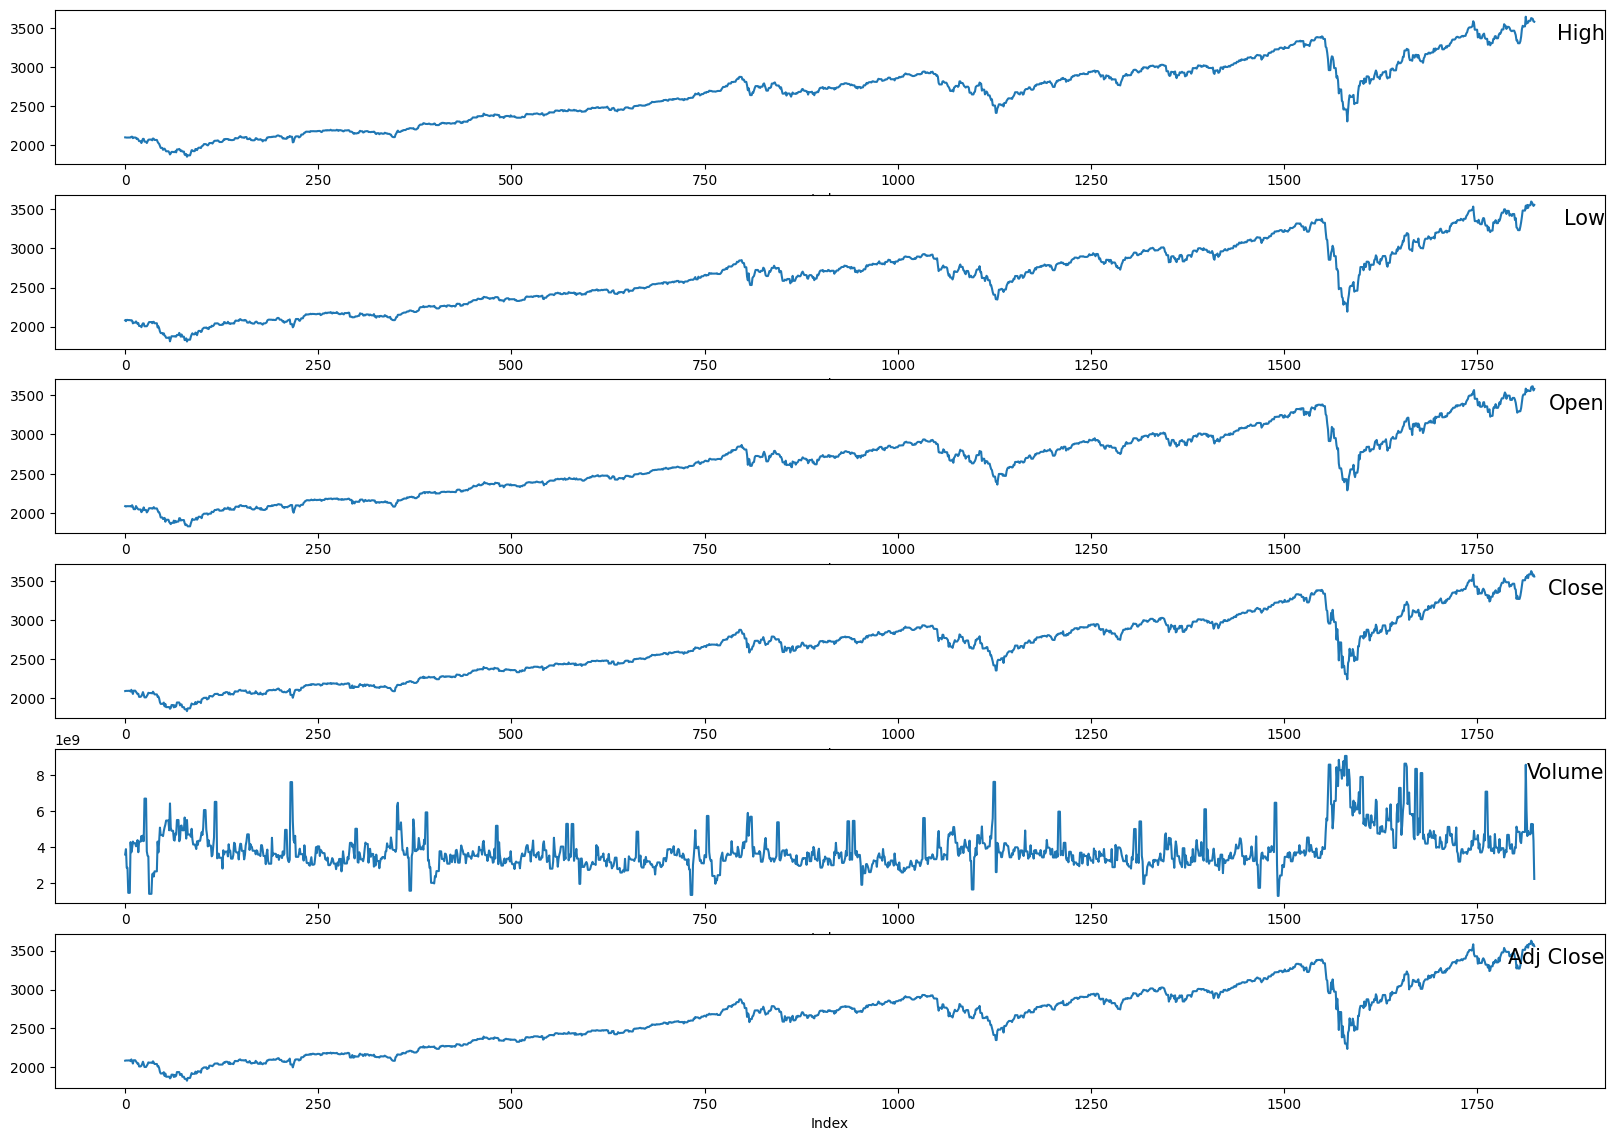

In [13]:
values = df.values

# Se seleccionan las columnas a graficar
groups = [1, 2, 3, 4, 5, 6]
i = 1

# Se grafican las columnas seleccionadas
plt.figure(figsize=(20,14))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.xlabel('Index')
    plt.title(df.columns[group], y=0.75, loc='right', fontsize = 15)
    i += 1
plt.show()

## Modelo

In [15]:
# Dividir en entrenamiento y prueba (80% - 20%)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [14]:
df['Date'] = pd.to_datetime(df['Date']).map(pd.Timestamp.timestamp)
train_data, val_data = train_test_split(df, test_size=0.2, shuffle=False)

KeyError: 'date'